Problem Statement

# New section

Celestial Dragon

Welcome to the year 2912, where your data science skills are needed to solve a
cosmic mystery. We've received a transmission from four light years away and
things aren't looking good.
The Celestial Dragon was an interstellar passenger liner launched a month ago.
With almost 13,000 passengers on board, the vessel set out on its maiden voyage
transporting emigrants from our solar system to three newly habitable exoplanets
orbiting nearby stars.
While rounding Alpha Centauri en route to its first destination—the torrid 55
Cancri E—the unwary Celestial Dragon collided with a space-time anomaly hidden
within a dust cloud. Though the ship stayed intact, almost half of the passengers
were transported to an alternate dimension!
Your task is to predict whether a passenger was transported to an alternate
dimension during the Celestial Dragon’s collision with the space-time anomaly.

1. Importing libraries and csv file(Data collection)

In [29]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Testing and training and feature selection
from sklearn.model_selection import train_test_split

#accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#ROC curve
from sklearn.metrics import roc_curve,auc

#downloading model
import joblib


In [30]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

Data Collection

In [31]:
train.shape

(8693, 14)

In [32]:
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [33]:
colList = train.columns.values
unique_value_list = [[x, train[x].nunique()] for x in colList]
unique_value_list


[['PassengerId', 8693],
 ['HomePlanet', 3],
 ['CryoSleep', 2],
 ['Cabin', 6560],
 ['Destination', 3],
 ['Age', 80],
 ['VIP', 2],
 ['RoomService', 1273],
 ['FoodCourt', 1507],
 ['ShoppingMall', 1115],
 ['Spa', 1327],
 ['VRDeck', 1306],
 ['Name', 8473],
 ['Transported', 2]]

Data Cleaning

In [34]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [35]:
train.duplicated().sum()

0

In [36]:
test.duplicated().sum()

0

In [37]:
missing_values = train.isnull().sum();
missing_values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [38]:
combine = [test, train]

In [39]:
cat_cols = train.columns[(train.dtypes == "object").tolist()].tolist()
num_cols = train.columns[(train.dtypes != 'object').tolist()].tolist()
print(cat_cols)
print(num_cols)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [40]:
for df in combine:
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['CryoSleep'].fillna(df['CryoSleep'].mean(),inplace = True)
  df['Cabin'].fillna(df['Cabin'].mode()[0],inplace = True)
  df['Destination'].fillna(df['Destination'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mean(),inplace = True)
  df['VIP'].fillna(df['VIP'].mean(),inplace = True)
  df['RoomService'].fillna(df['RoomService'].mean(),inplace = True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace = True)
  df['Spa'].fillna(df['Spa'].mean(),inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].mean(),inplace = True)
  df['Name'].fillna(df['Name'].mode()[0],inplace = True)

In [41]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [42]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [43]:
train.shape

(8693, 14)

In [44]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

**Categorical to Numerical conversion using Label encoder**

In [45]:
label_encoder = LabelEncoder()
#Coverting training categorical data to numerical data
train['HomePlanet'] = label_encoder.fit_transform(train['HomePlanet'])
train['Destination'] = label_encoder.fit_transform(train['Destination'])
train['CryoSleep'] = label_encoder.fit_transform(train['CryoSleep'])
train['VIP'] = label_encoder.fit_transform(train['VIP'])
train['Transported'] = label_encoder.fit_transform(train['Transported'])
label = train['Transported']
#Coverting testing categorical data to numerical data
test['HomePlanet'] = label_encoder.fit_transform(test['HomePlanet'])
test['Destination'] = label_encoder.fit_transform(test['Destination'])
test['CryoSleep'] = label_encoder.fit_transform(test['CryoSleep'])
test['VIP'] = label_encoder.fit_transform(test['VIP'])


In [46]:
train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin            object
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

Data Analysis(EDA - Exploratory Data Analysis)

In [47]:
train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin            object
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [48]:
features = train.drop(columns=['Transported'], axis=1)
label = train['Transported']
colList = features.columns.values
unique_value_list = [[x, features[x].nunique()] for x in colList]
unique_value_list

[['PassengerId', 8693],
 ['HomePlanet', 3],
 ['CryoSleep', 3],
 ['Cabin', 6560],
 ['Destination', 3],
 ['Age', 81],
 ['VIP', 3],
 ['RoomService', 1274],
 ['FoodCourt', 1508],
 ['ShoppingMall', 1116],
 ['Spa', 1328],
 ['VRDeck', 1307],
 ['Name', 8473]]

**Removing Names and PassengerId columns due to high cardinality**

In [49]:
train = train.drop(columns = ['Name', 'PassengerId'], axis=1)
final_test = test['PassengerId']
test = test.drop(columns = ['Name', 'PassengerId'], axis=1)

In [50]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=True)

,HomePlanet,Transported
0,0,0.427649
2,2,0.523024
1,1,0.658846


In [51]:
train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=True)

,Destination,Transported
2,2,0.472199
1,1,0.503769
0,0,0.610000


In [52]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=True)

,CryoSleep,Transported
0,0,0.328921
1,1,0.488479
2,2,0.817583


In [53]:
train[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=True)

,VIP,Transported
2,2,0.381910
0,0,0.506332
1,1,0.512315


<ipython-input-54-8769a51da1c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

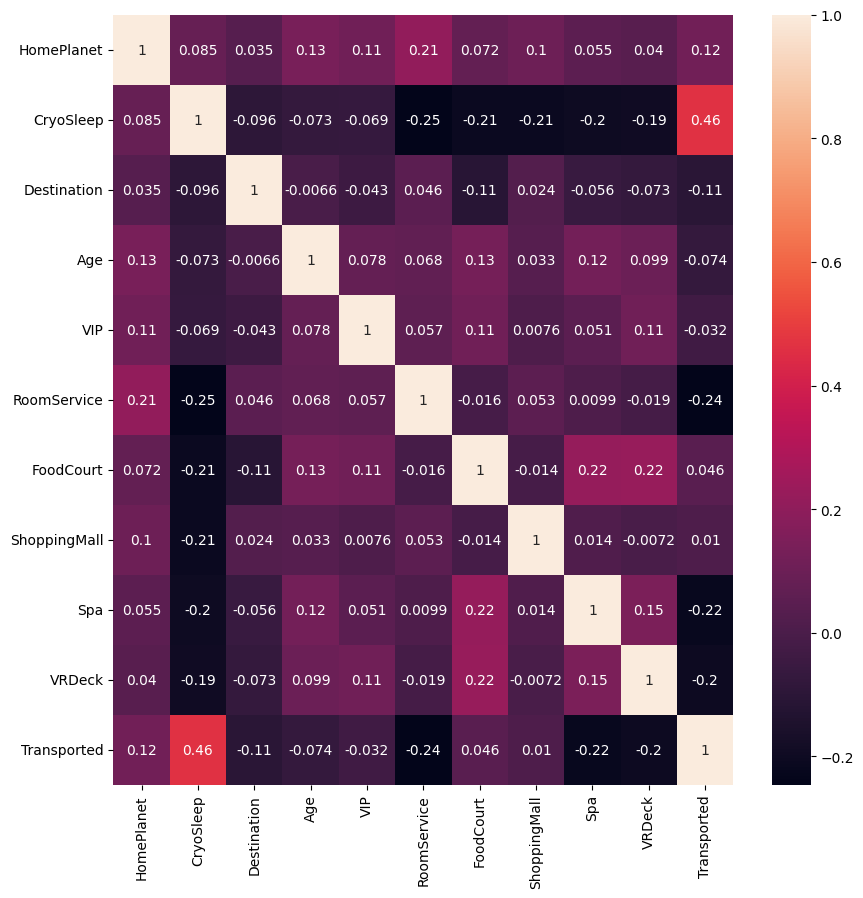

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

<Axes: xlabel='Transported', ylabel='RoomService'>

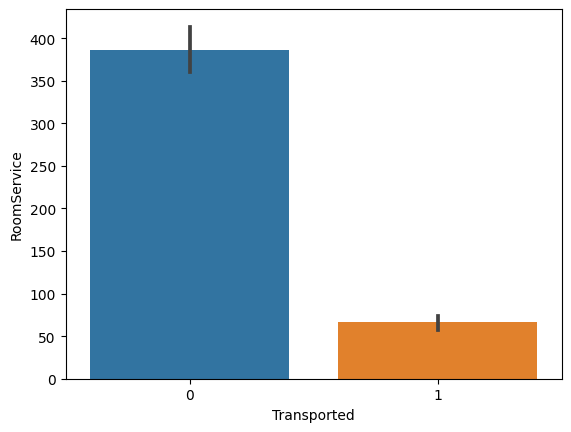

In [55]:
money_spent=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

sns.barplot(data=train, x='Transported', y='RoomService')


<Axes: xlabel='Transported', ylabel='FoodCourt'>

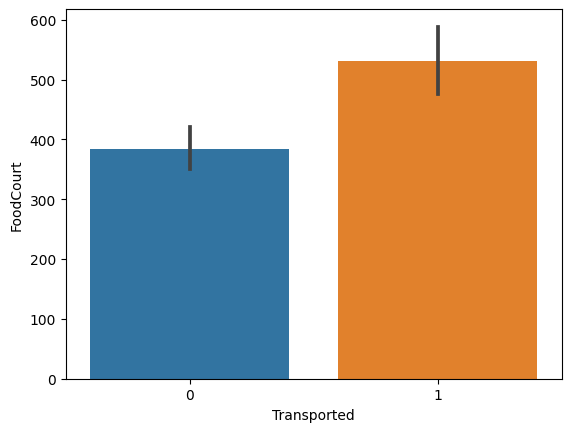

In [56]:
sns.barplot(data=train, x='Transported', y='FoodCourt')

<Axes: xlabel='Transported', ylabel='ShoppingMall'>

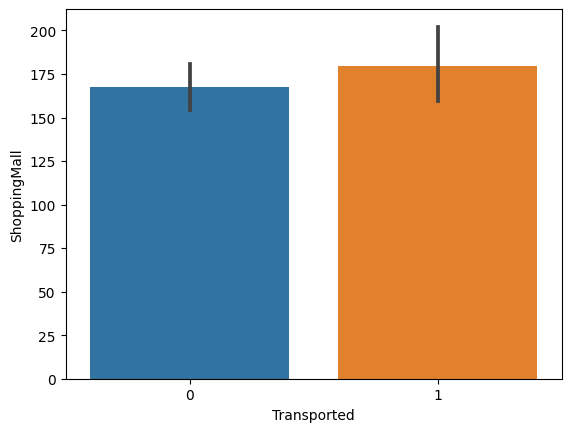

In [57]:
sns.barplot(data=train, x='Transported', y='ShoppingMall')

<Axes: xlabel='Transported', ylabel='Spa'>

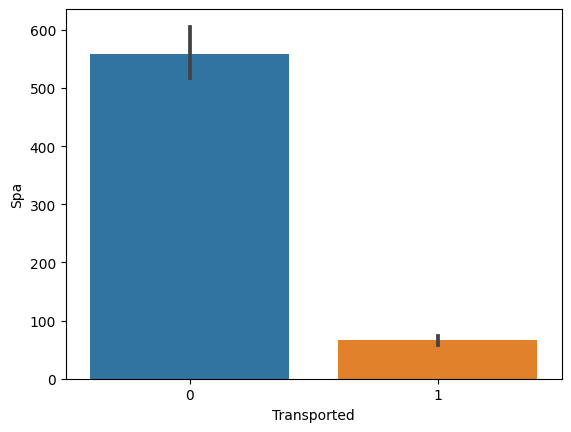

In [58]:
sns.barplot(data=train, x='Transported', y='Spa')

<Axes: xlabel='Transported', ylabel='VRDeck'>

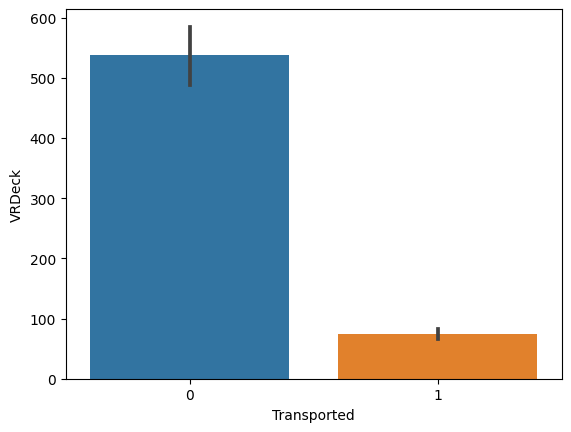

In [59]:
sns.barplot(data=train, x='Transported', y='VRDeck')

In [60]:
train['Total_spent']=train['RoomService']+train['FoodCourt']+train['Spa']+train['VRDeck']
test['Total_spent']=test['RoomService']+test['FoodCourt']+test['Spa']+test['VRDeck']
#Removing Expenses features as all of them are combined in Total_spent
train = train.drop(columns=['ShoppingMall', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck'], axis=1)
test = test.drop(columns=['ShoppingMall', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck'], axis=1)

<Axes: xlabel='Transported', ylabel='Total_spent'>

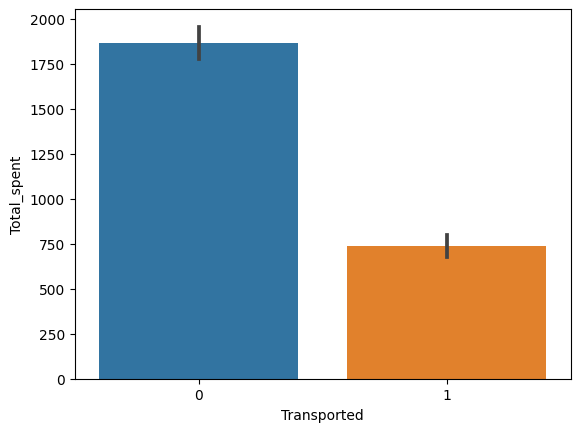

In [61]:
sns.barplot(data=train, x='Transported', y='Total_spent')

<Axes: xlabel='Transported', ylabel='CryoSleep'>

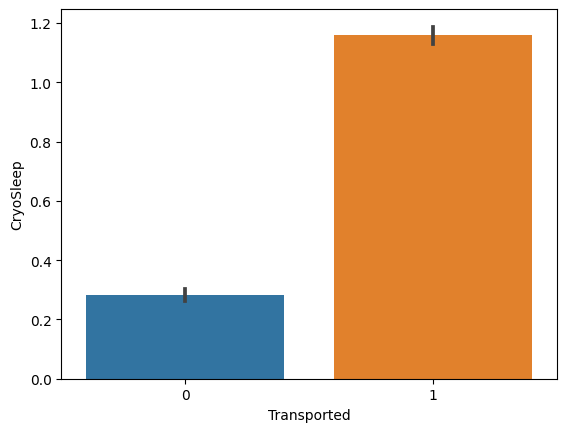

In [62]:
sns.barplot(data=train, x='Transported', y='CryoSleep')

<ipython-input-63-8769a51da1c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

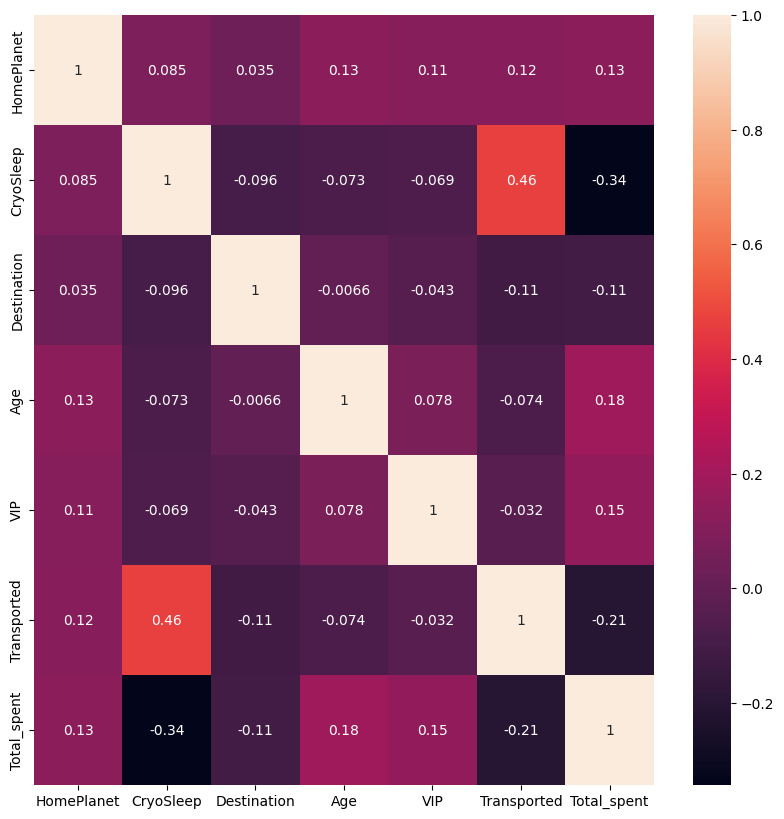

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

In [64]:
train['child']=train['Age'].apply(lambda x:1 if x<12 else 0)
train['youth']=train['Age'].apply(lambda x: 1 if x<=21 else 0)
train['middle_age']=train['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
train['old']=train['Age'].apply(lambda x: 1 if x>=60 else 0)

In [65]:
test['child']=test['Age'].apply(lambda x:1 if x<12 else 0)
test['youth']=test['Age'].apply(lambda x: 1 if x<=21 else 0)
test['middle_age']=test['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
test['old']=test['Age'].apply(lambda x: 1 if x>=60 else 0)

In [66]:
train_age = train[['Transported', 'child', 'youth','middle_age','old']]

<Axes: xlabel='variable', ylabel='Count'>

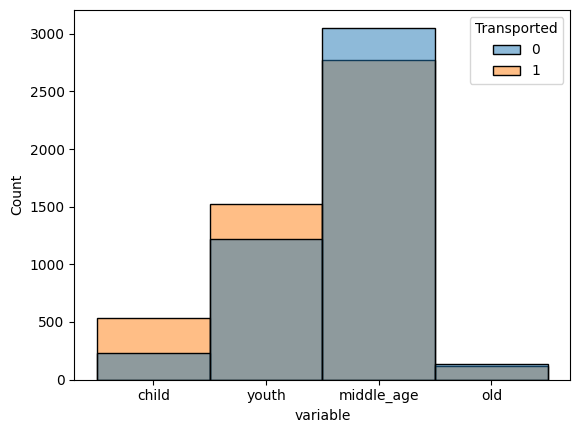

In [67]:
train_age=pd.melt(train_age, id_vars=['Transported'], value_vars=['child', 'youth','middle_age','old'])
train_age=train_age[train_age['value']==1]
sns.histplot(data=train_age, x='variable', hue='Transported')

In [68]:
train['cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['cabin_num'] = train['Cabin'].apply(lambda x: x.split('/')[1])
train['cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['cabin_num'] = test['Cabin'].apply(lambda x: x.split('/')[1])
test['cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])



<Axes: xlabel='cabin_deck', ylabel='count'>

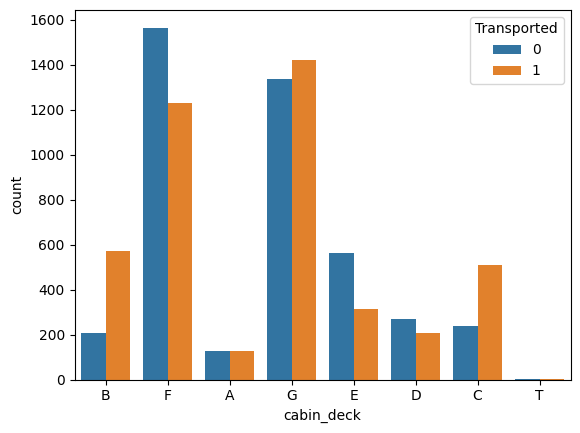

In [69]:
sns.countplot(data=train, x='cabin_deck', hue='Transported')

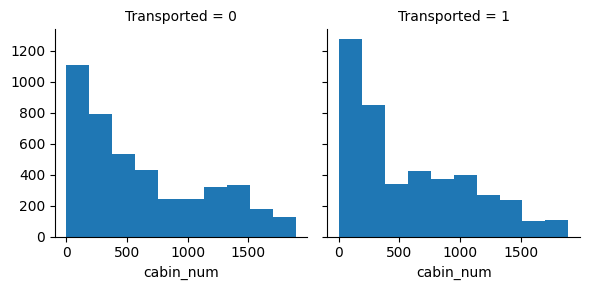

In [70]:
train['cabin_num']=train['cabin_num'].astype(int)
test['cabin_num']=test['cabin_num'].astype(int)

graph = sns.FacetGrid(train, col='Transported')
graph.map(plt.hist, 'cabin_num')

<Axes: xlabel='cabin_side', ylabel='Transported'>

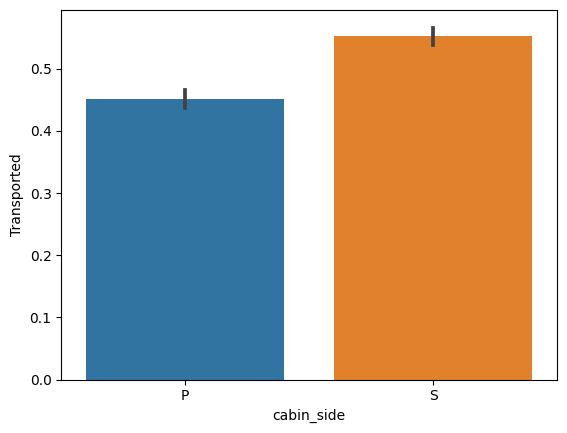

In [71]:
sns.barplot(data=train, x='cabin_side', y='Transported')

In [72]:
train['cabin_deck'] = label_encoder.fit_transform(train['cabin_deck'])
train['cabin_side'] = label_encoder.fit_transform(train['cabin_side'])

test['cabin_deck'] = label_encoder.fit_transform(test['cabin_deck'])
test['cabin_side'] = label_encoder.fit_transform(test['cabin_side'])


In [73]:
for df in combine:
    train['r1']=(train['cabin_num']<400).astype(int)
    train['r2']=((train['cabin_num']>=400)& (train['cabin_num']<600)).astype(int)
    train['r3']=((train['cabin_num']>=600)& (train['cabin_num']<1100)).astype(int)
    train['r4']=((train['cabin_num']>=1100)& (train['cabin_num']<1200)).astype(int)
    train['r5']=((train['cabin_num']>=1200)& (train['cabin_num']<1500)).astype(int)
    train['r6']=((train['cabin_num']>=1500)& (train['cabin_num']<1800)).astype(int)
    train['r7']=(train['cabin_num']>1800).astype(int)

In [74]:
for df in combine:
  test['r1']=(test['cabin_num']<400).astype(int)
  test['r2']=((test['cabin_num']>=400)& (test['cabin_num']<600)).astype(int)
  test['r3']=((test['cabin_num']>=600)& (test['cabin_num']<1100)).astype(int)
  test['r4']=((test['cabin_num']>=1100)& (test['cabin_num']<1200)).astype(int)
  test['r5']=((test['cabin_num']>=1200)& (test['cabin_num']<1500)).astype(int)
  test['r6']=((test['cabin_num']>=1500)& (test['cabin_num']<1800)).astype(int)
  test['r7']=(test['cabin_num']>1800).astype(int)

In [75]:
train = train.drop(columns=['Age', 'Cabin', 'old', 'Total_spent', 'cabin_side'], axis=1)
test = test.drop(columns=['Age', 'Cabin', 'old', 'Total_spent', 'cabin_side'], axis=1)

<Axes: >

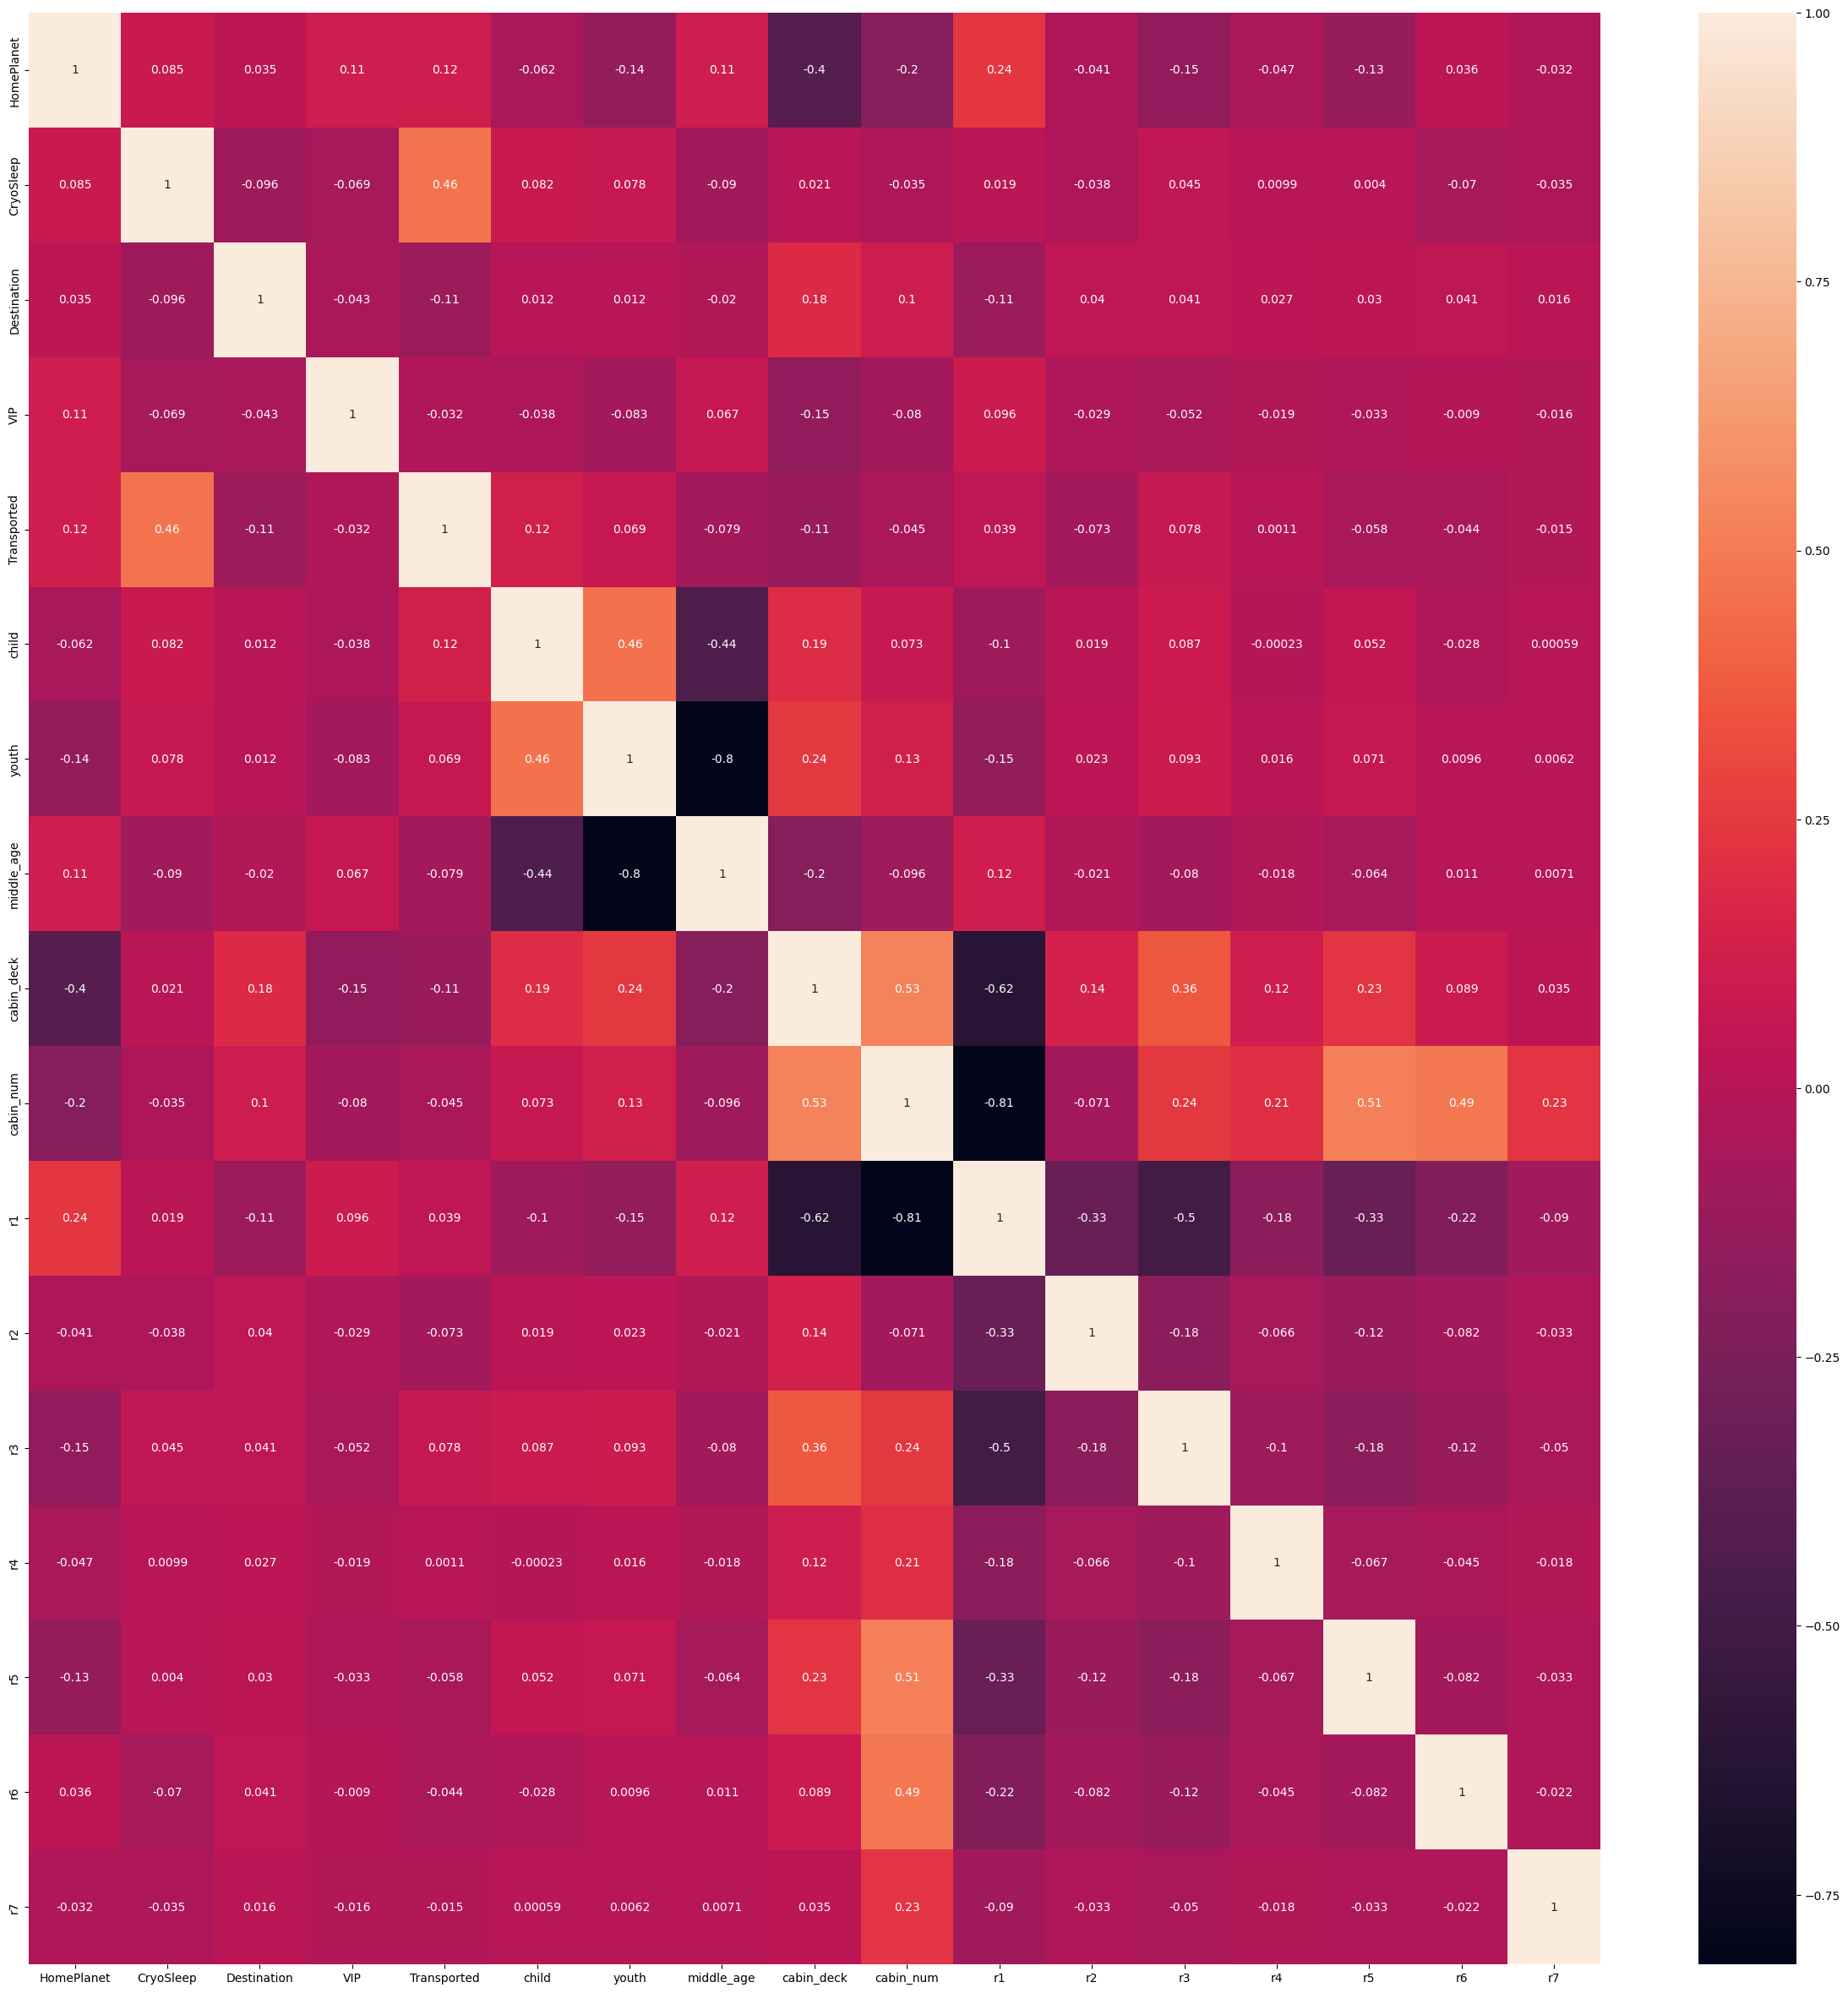

In [76]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True)

In [77]:
cor_matrix = train.corr().abs()
print(cor_matrix)

             HomePlanet  CryoSleep  Destination       VIP  Transported  \
HomePlanet     1.000000   0.084531     0.034737  0.109614     0.115461   
CryoSleep      0.084531   1.000000     0.096443  0.068716     0.462026   
Destination    0.034737   0.096443     1.000000  0.042568     0.108152   
VIP            0.109614   0.068716     0.042568  1.000000     0.032360   
Transported    0.115461   0.462026     0.108152  0.032360     1.000000   
child          0.061854   0.082403     0.012385  0.037794     0.121599   
youth          0.140806   0.077725     0.012036  0.083398     0.069314   
middle_age     0.113761   0.090192     0.019614  0.067294     0.079080   
cabin_deck     0.404593   0.020686     0.180763  0.151438     0.113992   
cabin_num      0.198511   0.035481     0.101931  0.080308     0.044556   
r1             0.235863   0.018595     0.107852  0.095712     0.038729   
r2             0.040577   0.038066     0.039508  0.029107     0.072669   
r3             0.151383   0.044886    

In [78]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

             HomePlanet  CryoSleep  Destination       VIP  Transported  \
HomePlanet          NaN   0.084531     0.034737  0.109614     0.115461   
CryoSleep           NaN        NaN     0.096443  0.068716     0.462026   
Destination         NaN        NaN          NaN  0.042568     0.108152   
VIP                 NaN        NaN          NaN       NaN     0.032360   
Transported         NaN        NaN          NaN       NaN          NaN   
child               NaN        NaN          NaN       NaN          NaN   
youth               NaN        NaN          NaN       NaN          NaN   
middle_age          NaN        NaN          NaN       NaN          NaN   
cabin_deck          NaN        NaN          NaN       NaN          NaN   
cabin_num           NaN        NaN          NaN       NaN          NaN   
r1                  NaN        NaN          NaN       NaN          NaN   
r2                  NaN        NaN          NaN       NaN          NaN   
r3                  NaN        NaN    

<ipython-input-78-56dc5b2d0b9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [79]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)

['middle_age', 'cabin_num', 'r1', 'r5']


In [80]:
test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'child', 'youth',
       'middle_age', 'cabin_deck', 'cabin_num', 'r1', 'r2', 'r3', 'r4', 'r5',
       'r6', 'r7'],
      dtype='object')

In [81]:
#feature selection
train = train.drop(columns=to_drop, axis=1)
test = test.drop(columns=to_drop, axis=1)

In [82]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,child,youth,cabin_deck,r2,r3,r4,r6,r7
0,1,0,2,0,0,0,0,1,0,0,0,0,0
1,0,0,2,0,1,0,0,5,0,0,0,0,0
2,1,0,2,2,0,0,0,0,0,0,0,0,0
3,1,0,2,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1,5,0,0,0,0,0


Preparing Test data

<Axes: >

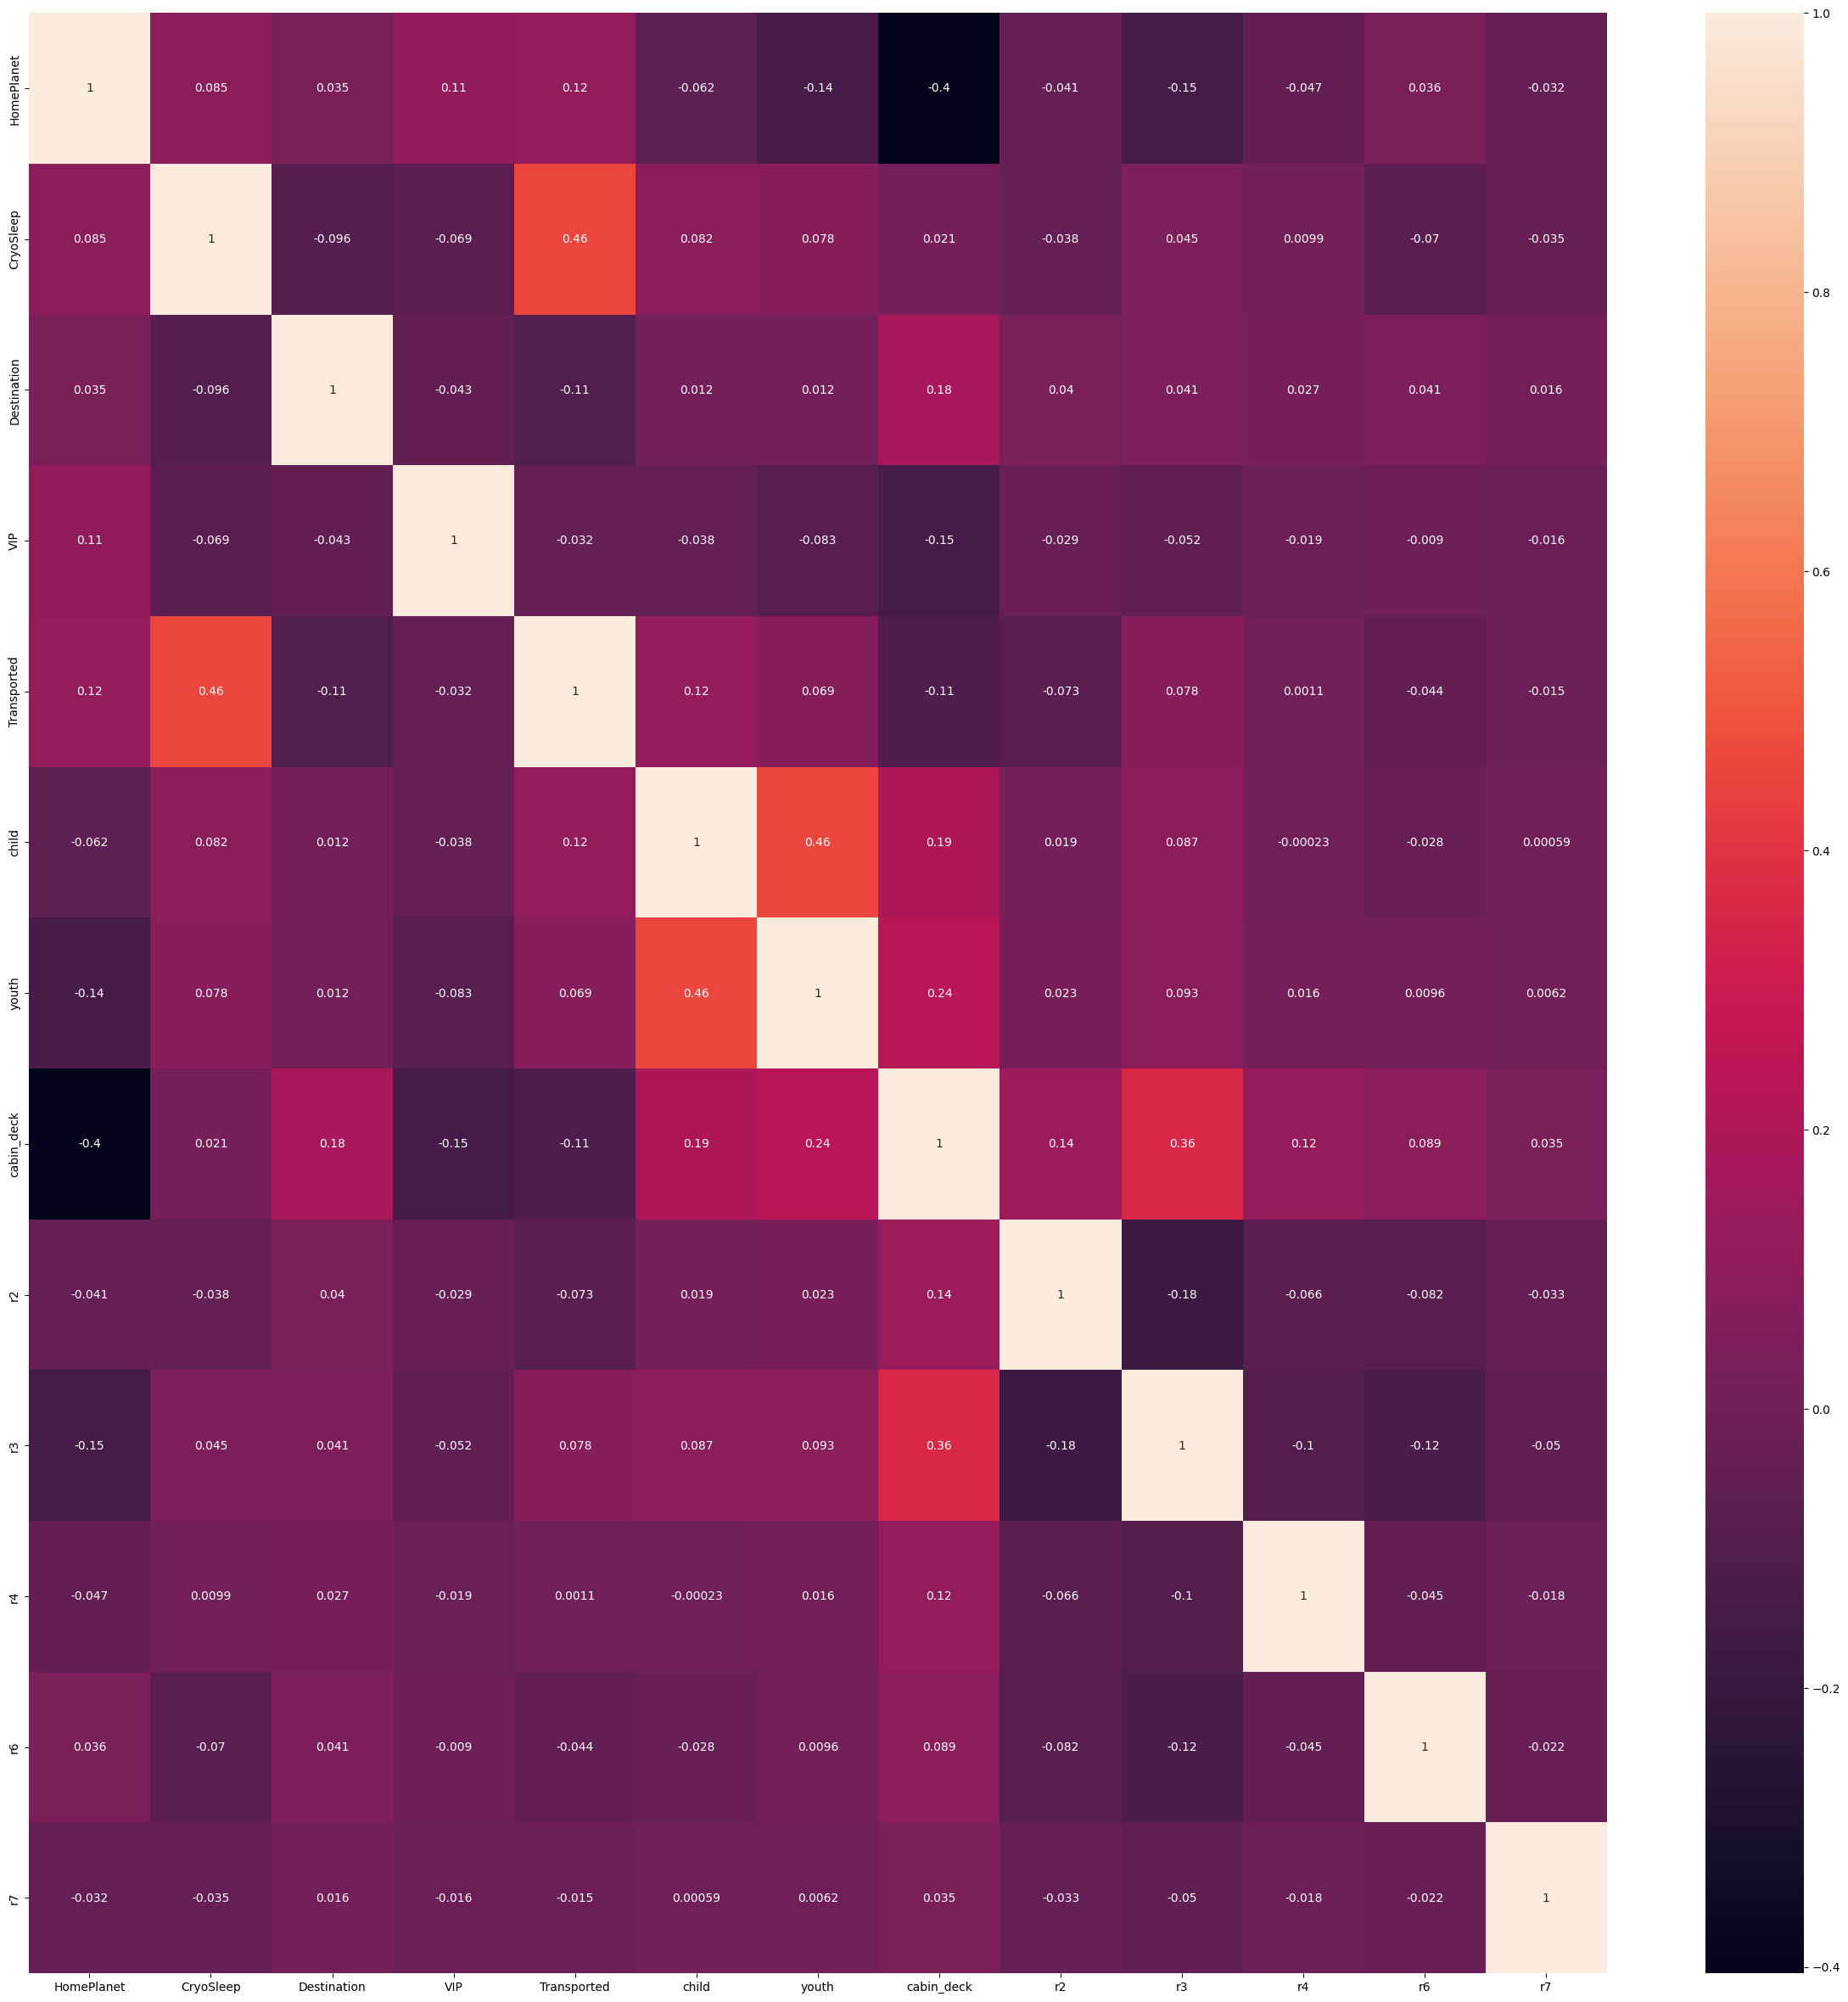

In [83]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True)

In [84]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'child',
       'youth', 'cabin_deck', 'r2', 'r3', 'r4', 'r6', 'r7'],
      dtype='object')

In [85]:
test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'child', 'youth',
       'cabin_deck', 'r2', 'r3', 'r4', 'r6', 'r7'],
      dtype='object')

**Splitting training and testing data**

In [87]:
sample = pd.read_csv('sample_submission.csv')
sample['Transported'] = label_encoder.fit_transform(sample['Transported'])
#train = train.drop(columns=['Total_spent'], axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(train.drop(columns=['Transported'], axis=1),label,test_size=0.2,random_state=0)

In [88]:
X_train.dtypes

HomePlanet     int64
CryoSleep      int64
Destination    int64
VIP            int64
child          int64
youth          int64
cabin_deck     int64
r2             int64
r3             int64
r4             int64
r6             int64
r7             int64
dtype: object

In [89]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,child,youth,cabin_deck,r2,r3,r4,r6,r7
0,1,0,2,0,0,0,0,1,0,0,0,0,0
1,0,0,2,0,1,0,0,5,0,0,0,0,0
2,1,0,2,2,0,0,0,0,0,0,0,0,0
3,1,0,2,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1,5,0,0,0,0,0


In [90]:
label.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [91]:
Y_train.dtypes

dtype('int64')

In [92]:
X_test.dtypes

HomePlanet     int64
CryoSleep      int64
Destination    int64
VIP            int64
child          int64
youth          int64
cabin_deck     int64
r2             int64
r3             int64
r4             int64
r6             int64
r7             int64
dtype: object

In [93]:
Y_test.dtypes

dtype('int64')

**Model building**

**Data Scaling**

In [94]:
'''sc = StandardScaler()
X_train_df = sc.fit_transform(X_train)
X_test_df = sc.transform(X_test)'''

scaler = MinMaxScaler()
X_train_df = scaler.fit_transform(X_train)
X_test_df = scaler.fit_transform(X_test)
data_normalized = pd.DataFrame(X_train_df, columns=X_train.columns)

In [95]:
X_train_df

array([[0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [1. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ]])

Logistic Regression

In [96]:
logreg = LogisticRegression()
logreg.fit(X_train_df, Y_train)
Y_pred = logreg.predict(X_test_df)
acc_log = round(logreg.score(X_train_df, Y_train) * 100, 2)
acc_log

72.38

In [97]:
#Confusion Matrix accuracy prediction
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[690 173]
 [332 544]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       863
           1       0.76      0.62      0.68       876

    accuracy                           0.71      1739
   macro avg       0.72      0.71      0.71      1739
weighted avg       0.72      0.71      0.71      1739

Confusion matrix accuracy : 70.9603


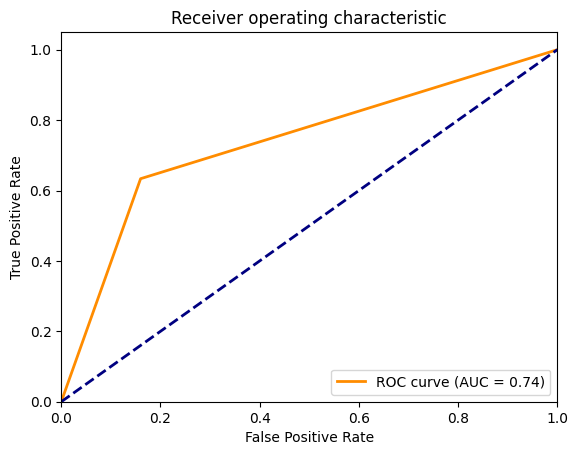

In [110]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Support Vector Machines

In [111]:
svc = SVC()
svc.fit(X_train_df, Y_train)
Y_pred = svc.predict(X_test_df)
acc_svc = round(svc.score(X_train_df, Y_train) * 100, 2)
acc_svc

73.84

In [112]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[724 139]
 [334 542]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       863
           1       0.80      0.62      0.70       876

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.72      1739
weighted avg       0.74      0.73      0.72      1739

Confusion matrix accuracy : 72.8005


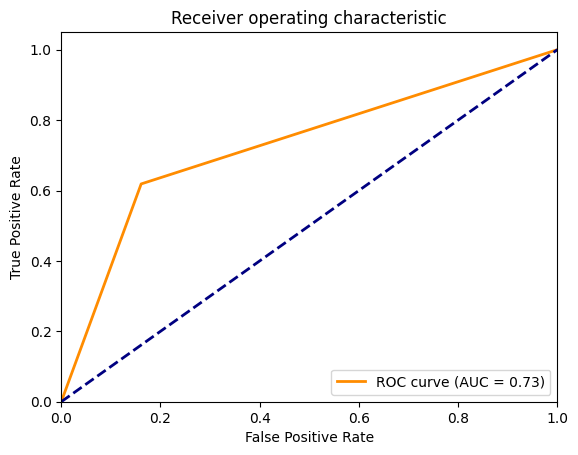

In [113]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [114]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train_df, Y_train)
Y_pred = decision_tree.predict(X_test_df)
acc_decision_tree = round(decision_tree.score(X_train_df, Y_train) * 100, 2)
acc_decision_tree

73.87

Confusion Matrix accuracy prediction


In [115]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[724 139]
 [331 545]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.75       863
           1       0.80      0.62      0.70       876

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

Confusion matrix accuracy : 72.9730


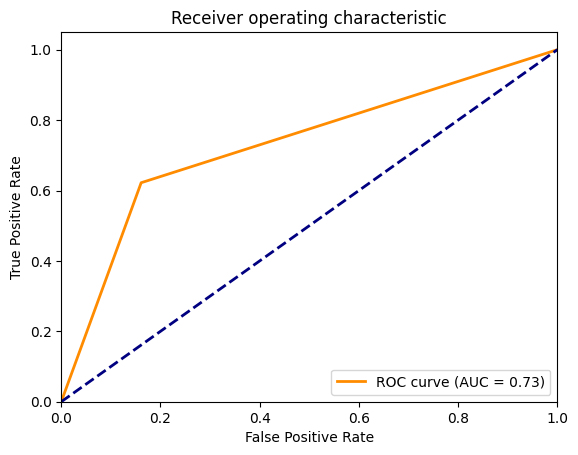

In [116]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

GaussianNB

In [98]:
gaussian = GaussianNB()
gaussian.fit(X_train_df, Y_train)
Y_pred = gaussian.predict(X_test_df)
acc_gaussian = round(gaussian.score(X_train_df, Y_train) * 100, 2)
acc_gaussian

70.3

Confusion Matrix accuracy prediction


In [99]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[634 229]
 [295 581]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       863
           1       0.72      0.66      0.69       876

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739

Confusion matrix accuracy : 69.8677


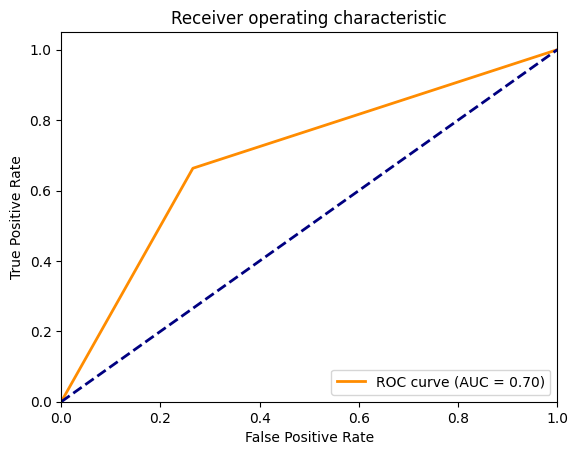

In [100]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

XG BOOST

In [101]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,Y_train)
Y_pred = xgb_model.predict(X_test)
acc_xg=accuracy_score(Y_test,Y_pred)*100
print(acc_xg)

73.60552041403106


In [102]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[725 138]
 [321 555]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       863
           1       0.80      0.63      0.71       876

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.73      1739
weighted avg       0.75      0.74      0.73      1739

Confusion matrix accuracy : 73.6055


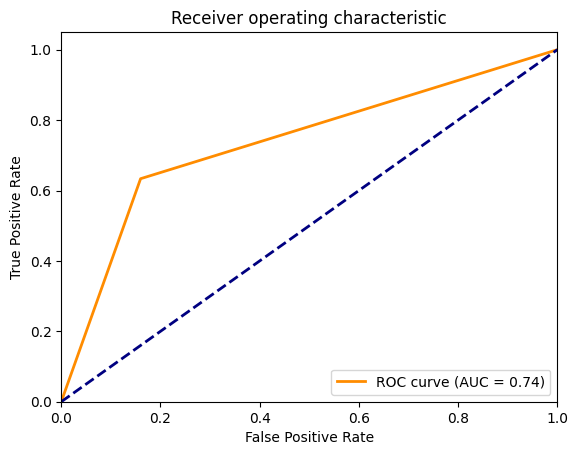

In [103]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AdaBoost Classifier

In [104]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
adaboost.fit(X_train_df, Y_train)
y_pred = adaboost.predict(X_test)

acc_ada = round(adaboost.score(X_train_df, Y_train) * 100, 2)
print(f"Accuracy: {acc_ada}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 72.13


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [105]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Confusion matrix accuracy : {0:0.4f}'.format(classification_accuracy * 100))

[[725 138]
 [321 555]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       863
           1       0.80      0.63      0.71       876

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.73      1739
weighted avg       0.75      0.74      0.73      1739

Confusion matrix accuracy : 73.6055


ROC curve

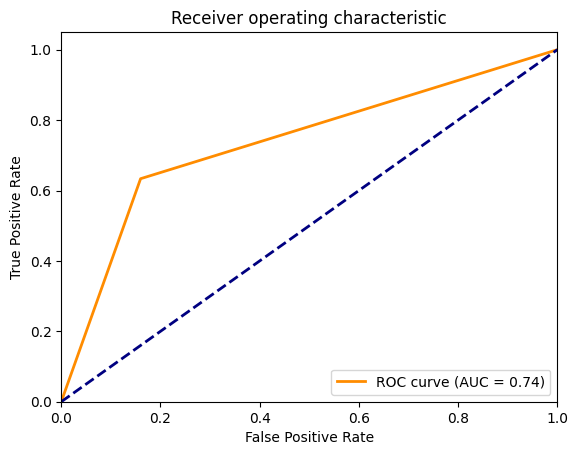

In [106]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Comparison Table

In [118]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Naive Bayes', 'Decision Tree','AdaBoost','XG Boost'],
    'Score': [acc_svc, acc_log, acc_gaussian,acc_decision_tree,acc_ada,acc_xg]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,73.87000
0,Support Vector Machines,73.84000
5,XG Boost,73.60552
1,Logistic Regression,72.38000
4,AdaBoost,72.13000
2,Naive Bayes,70.30000


**Testing Model with test data**

In [119]:
submission=decision_tree.predict(test)
test['Transported'] = submission
test['PassengerId'] = final_test
#final_test.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [120]:
final_test  = test[['PassengerId', 'Transported']]
final_test.iloc[:, 1] = final_test.iloc[:, 1].astype(bool)
final_test.head()

<ipython-input-120-e61e49a8ed68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test.iloc[:, 1] = final_test.iloc[:, 1].astype(bool)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


**Deployment**

In [121]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 

In [131]:
import gradio as gr
import numpy  as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("test.csv")

def predict_transported(HomePlanet, CryoSleep, Destination, VIP, child, youth, cabin_deck, r2, r3, r4, r6, r7):
    sample= np.array([HomePlanet, CryoSleep, Destination, VIP, child, youth, cabin_deck, r2, r3, r4, r6, r7]).reshape(1,-1)
    prediction=decision_tree.predict(sample)
    return "Transported" if prediction[0] == 1 else "Not Transported"

# Splitting the dataset into training and testing set
#X_train,X_test,Y_train,Y_test=train_test_split(train.drop(columns=['Transported'], axis=1),label,test_size=0.2,random_state=0)

# Creating the Gradio interface
input_components = [
    gr.inputs.Number(label="HomePlanet"),
    gr.inputs.Number(label="CryoSleep"),
    gr.inputs.Number(label="Destination"),
    gr.inputs.Number(label="VIP"),
    gr.inputs.Number(label="child"),
    gr.inputs.Number(label="youth"),
    gr.inputs.Number(label="cabin_deck"),
    gr.inputs.Number(label="r2"),
    gr.inputs.Number(label="r3"),
    gr.inputs.Number(label="r4"),
    gr.inputs.Number(label="r6"),
    gr.inputs.Number(label="r7")

]

interface = gr.Interface(
    fn=predict_transported,
    inputs=input_components,
    outputs=gr.outputs.Textbox(label="Passengers Transported"),
    title="Celestial Dragon",
    description="Predict whether a passenger is transported to another dimension or not",
    layout="vertical",
    theme="compact"
)

# Launching the interface
interface.launch(debug = True,share=True)

ImportError: ignored

In [ ]:
!pip install joblib

In [ ]:
joblib.dump(decision_tree, 'decision_tree.joblib')